# Matching and finding relavant jobs for a Resume

# Sprint 3

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## After adding text for better similarity 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [15]:
import numpy as np
import pandas as pd
# import json
import matplotlib.pyplot as plt
%matplotlib inline

# import re
# import datetime
# from datetime import date
# from time import strptime

from sklearn.metrics.pairwise import cosine_similarity

In [16]:
# reading my sorted resume csv
resume = pd.read_csv('wip/con_resume.csv')

In [17]:
# reading my sorted job csv
job = pd.read_csv('wip/con_job.csv')

In [18]:
# resume features to be matched with jobs
r_df = resume[['resume_id','experience_range','is_grad','is_postgrad','is_doc','location',
              'vec_1','vec_2','vec_3','vec_4','vec_5','vec_6','vec_7','vec_8','vec_9','vec_10','vec_11','vec_12',
              'vec_13','vec_14','vec_15','vec_16','vec_17','vec_18','vec_19','vec_20']]
#r_df.head()

In [158]:
#My recommender system to find best jobs for a given resume
def jobs_recommender(r) :
    
    #job features need to be matched with resume
    job_m = related_jobs[['j_id','experience_range','is_grad','is_postgrad','is_doc','location',
                     'vec_1','vec_2','vec_3','vec_4','vec_5','vec_6','vec_7','vec_8','vec_9','vec_10','vec_11','vec_12',
                      'vec_13','vec_14','vec_15','vec_16','vec_17','vec_18','vec_19','vec_20']]
    
    #Store the results in this DF - to showcase
    matched_jobs = pd.DataFrame(columns = ["id","company","job_title","jobdescription","experience_range","location","similarity"] )
    
    r= r.to_numpy()
    r= r.reshape(1, -1)
    #Go through ALL the related jobs
    for jd in job_m['j_id'] :
        #print(f'jd is {jd}')        
        #Find the similarity of the jobs with resume
        jobs = job_m.loc[jd]
        jobs = jobs.to_numpy()
        jobs = jobs.reshape(1, -1)
        #print(f'job is {jobs}')
        #print(f'r is {r}')
        #print(f'job is {job}')
        similarity = cosine_similarity(r,jobs)
        #print(f'similarity is {similarity}')
        matched_jobs.loc[len(matched_jobs)] = [jd,
                                               related_jobs['company'][jd],
                                               related_jobs['jobtitle'][jd],
                                               related_jobs['jobdescription'][jd],
                                               related_jobs['experience_range'][jd],
                                               related_jobs['location'][jd],
                                               similarity[0][0]]
        

    return matched_jobs.sort_values(by=['similarity'],ascending=False)[1:]

### Example 1.  - matching and recommending jobs for a sql dba

In [20]:
#resume = resume.dropna(axis=0, subset=['Resume_title'])
#job = job.dropna(axis=0, subset=['jobtitle'])

In [125]:
#picking a random resume from resume dataset
resume.loc[resume['Resume_title'].str.contains("python")]

,index,Resume_title,City,location,Description,work_experiences,Educations,Skills,Links,Certificates,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
108,108,python or java developer,NONE,1,to obtain a meaningful and challenging positio...,"{0: [{'wtitle:': 'java developer'}, {'wcompany...",{0: [{'e_title:': 'Diploma in information tech...,['organized work habits with good interpersona...,[],{},...,-2.700808,0.636378,0.417574,-0.601642,-1.166247,1.023376,0.589711,-0.429799,-0.215171,-2.613362
184,184,highly motivated full stack java developer wit...,Mumbai,20,full stack developer with 8.8 years of hands o...,"{0: [{'wtitle:': 'java developer'}, {'wcompany...","{0: [{'e_title:': 'HSC'}, {'e_schoolname:': 'M...","['java (9 years)', ' sql (6 years)', ' oracle ...","['https://github.com/shashankvishwakarma', 'ht...",{},...,-0.653398,-0.754938,-2.377083,0.958963,-1.431931,-0.204290,0.498272,0.662944,1.166370,-2.026214
333,333,python developer,Pune,20,• to contribute in the continual improvement o...,"{0: [{'wtitle:': 'java developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electronic co...","['unix/linux', ' java', ' python', ' django', ...",[],{},...,-0.452587,-0.337809,-2.304784,-0.589803,0.632907,-0.186267,-0.527995,-1.177034,-1.345043,0.310445
358,358,python developer,Pune,20,• to contribute in the continual improvement o...,"{0: [{'wtitle:': 'java developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electronic co...","['unix/linux', ' java', ' python', ' django', ...",[],{},...,-0.471368,-0.296018,-2.228817,-0.467316,0.634097,-0.026914,-0.583195,-1.118498,-1.363660,0.432486
406,406,b.tech in computer science.able to work with c...,NONE,1,to excel in my career where i can implement an...,"{0: [{'wtitle:': 'java developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Computer scie...","['c', 'java', ' my aql', ' html5']",[],{},...,-1.287278,1.432007,-0.677026,0.601792,-1.245152,2.125073,0.553628,1.135851,-0.165700,-0.483160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13409,13409,python developer - dutch bank,Coral Gables,0,➢ experienced professional with over 5 years o...,"{0: [{'wtitle:': 'python developer'}, {'wcompa...","{0: [{'e_title:': ""Bachelor's""}, {'e_schoolnam...","['django (5 years)', ' javascript (5 years)', ...",[],{},...,-1.447367,-1.107865,-0.919243,-0.750229,-1.499782,0.805215,0.199863,-0.936390,0.097830,-2.707687
13413,13413,"6.8 years of total experience, including 3.5 y...",Delhi,9,,"{0: [{'wtitle:': 'python developer'}, {'wcompa...","{0: [{'e_title:': 'Bachelor of Arts'}, {'e_sch...","['javascript (2 years)', ' bootstrap (2 years)...",[],{},...,-0.398912,-1.151285,-1.674038,-0.154166,-1.238158,-0.840306,0.357323,-0.051814,1.357467,-2.842334
13415,13415,python developer - evarient,Waynesboro,0,• 10+ years of professional experience in anal...,"{0: [{'wtitle:': 'python developer'}, {'wcompa...","{0: [{'e_title:': 'Bachlores'}, {'e_schoolname...","['django (10+ years)', ' mysql (10+ years)', '...",[],{},...,-0.505966,-1.490791,-1.849703,-0.683998,-1.246481,-0.289629,0.548820,-0.849752,0.291158,-2.760585
13420,13420,python developer,Chennai,30,,"{0: [{'wtitle:': 'python developer'}, {'wcompa...","{0: [{'e_title:': 'HSC in Board'}, {'e_schooln...","['windows: windows.', ' python (2 years)', ' r...",[],{},...,0.612701,-2.271394,-0.320964,1.367896,0.348370,2.250596,-0.728439,-1.129954,-1.011796,-2.258759


In [177]:
# r1 contrains the only features to be matched of slected resume  13769-java, 2405 - sql dba, 9934-php , 13413- python
# make yor selection and input resume id here
r1= r_df.loc[13769]
r1

resume_id           13769.000000
experience_range        1.000000
is_grad                 1.000000
is_postgrad             0.000000
is_doc                  0.000000
location               16.000000
vec_1                  -2.521301
vec_2                  -1.176523
vec_3                   0.287569
vec_4                  -0.941934
vec_5                   0.950572
vec_6                   0.373579
vec_7                   1.421647
vec_8                  -0.447369
vec_9                   1.464513
vec_10                  1.008403
vec_11                 -0.831278
vec_12                 -0.459660
vec_13                 -2.661814
vec_14                 -0.384292
vec_15                 -0.297697
vec_16                 -1.657926
vec_17                  1.252299
vec_18                 -0.291483
vec_19                  2.133303
vec_20                 -2.308459
Name: 13769, dtype: float64

In [178]:
#from pool of 34,000 jobs, selecting jobs that are releated to sql dba (resume in question)
related_jobs = job.loc[job['jobtitle'].str.contains("java")]


In [179]:
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)


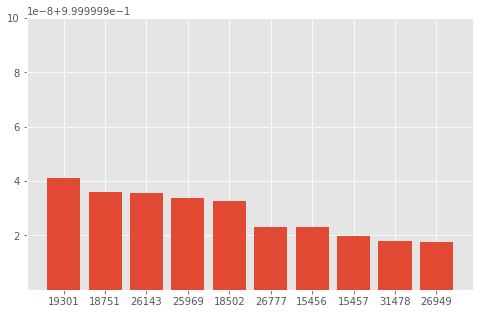

,id,company,job_title,jobdescription,experience_range,location,similarity
563,19301,Blue Bird Technologies Pvt. Ltd. hiring for Cl...,java/ j2ee developer,Job Description Send me Jobs like this 1. Co...,1,20,1.0
536,18751,Tata Consultancy Services Ltd.,java architect,Job Description Send me Jobs like this Job D...,2,20,1.0
784,26143,Careernet Technologies Pvt Ltd,"technical architect,java architect, mobility a...",Job Description Send me Jobs like this Job D...,2,33,1.0
772,25969,CBSI India Pvt. Ltd.,java developer with spring and hibernate: 4-8 ...,Job Description Send me Jobs like this Java ...,1,30,1.0
521,18502,Anlage Infotech (I) Pvt. Ltd. hiring for Busin...,senior / lead programmer - core java,Job Description Send me Jobs like this Job D...,1,20,1.0
821,26777,Softtech Career Infosystem Pvt. Ltd,java tech lead - j2ee/spring/hibernate,Job Description Send me Jobs like this Key W...,2,30,1.0
421,15456,Right Avenue Enterprises,java esb integration developer,Job Description Send me Jobs like this Job D...,1,16,1.0
422,15457,Right Avenue Enterprises,java esb integration developer,Job Description Send me Jobs like this Job D...,1,20,1.0
900,31478,Encore IT Services Solutions Pvt Ltd,need sr.java professionals / 7+ yrs / chennai ...,Job Description Send me Jobs like this Years...,2,30,1.0
830,26949,BlueRose Technologies Pvt Ltd,excellent job opportunity for java lead with 5...,Job Description Send me Jobs like this Blue ...,1,30,1.0


In [182]:
# Plotting graph to visualize 10 best jobs

x=matched_jobs['id']
y=matched_jobs['similarity']

#plt.xticks(rotation=90)
x_pos = [i for i, _ in enumerate(x)]
x_pos
#plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(x_pos, y,color='#E24A33') # my shade of red
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.9999999,1])
plt.xticks(x_pos, x)
plt.show()
matched_jobs

In [155]:
r1= r_df.loc[1]
r1

resume_id            1.000000
experience_range     0.000000
is_grad              1.000000
is_postgrad          1.000000
is_doc               0.000000
location            16.000000
vec_1               -0.786235
vec_2               -1.306011
vec_3               -1.383107
vec_4               -1.669708
vec_5                0.832136
vec_6                1.849790
vec_7                0.178872
vec_8               -1.736894
vec_9                0.741685
vec_10               1.553933
vec_11              -2.916478
vec_12              -0.712572
vec_13              -0.502129
vec_14              -0.849293
vec_15               0.435406
vec_16               0.339330
vec_17               0.060282
vec_18              -0.415035
vec_19               3.203696
vec_20              -3.607635
Name: 1, dtype: float64

In [184]:
related_jobs = job.loc[job['jobtitle'].str.contains("developer")]

In [185]:
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)

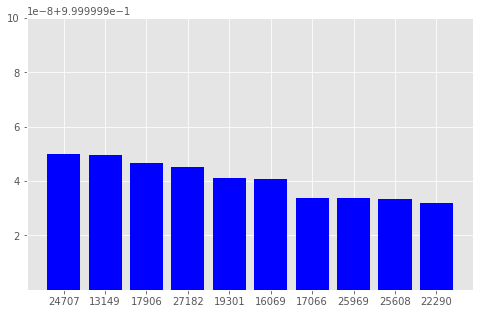

,id,company,job_title,jobdescription,experience_range,location,similarity
2492,24707,Hirexa Solutions Pvt. Ltd.,mdm infosphere developer,Job Description Send me Jobs like this MDM I...,2,30,1.0
1465,13149,Diksha Technologies,tibco iprocess developers,Job Description Send me Jobs like this Exper...,1,16,1.0
1832,17906,Green HR Solutions hiring for Service based co...,pentaho architect (pentaho bi developer),Job Description Send me Jobs like this Desig...,1,20,1.0
2721,27182,Midasis Technologies Pvt. Ltd.,java developer _ chennai,Job Description Send me Jobs like this Exp: ...,1,30,1.0
2007,19301,Blue Bird Technologies Pvt. Ltd. hiring for Cl...,java/ j2ee developer,Job Description Send me Jobs like this 1. Co...,1,20,1.0
1661,16069,Confidential,senior perl developer,Job Description Send me Jobs like this * 5+ ...,1,16,1.0
1748,17066,Value Search,software developer / architect - sharepoint,Job Description Send me Jobs like this Posit...,2,20,1.0
2576,25969,CBSI India Pvt. Ltd.,java developer with spring and hibernate: 4-8 ...,Job Description Send me Jobs like this Java ...,1,30,1.0
2542,25608,GE,sr solutions developer - business solutions,Job Description Send me Jobs like this Role ...,1,30,1.0
2298,22290,Bobtech Solutions Private Limited,onsite opportunity for liferay portal developer,Job Description Send me Jobs like this Java ...,1,30,1.0


In [214]:
# Plotting graph to visualize 10 best jobs
x=matched_jobs['id']
y=matched_jobs['similarity']
#plt.xticks(rotation=90)
x_pos = [i for i, _ in enumerate(x)]


#plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(x_pos, y,color='blue') # my shade of red
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.9999999,1])
plt.xticks(x_pos, x)
plt.show()
matched_jobs

In [197]:
a1= resume.loc[resume['resume_id'] == 1,'experience_desc']


In [200]:
print(list(a1))

["['working as software developer at ingroinfo software solutions pvt ltd \\nwith 1 year 2 month (01/2019- present) of experience in different phases of software development including front-end to back-end development, \\ndatabase. \\n \\nexperience in mysql, java, j2ee, spring, hibernate, oracle 11g \\n \\nexperience on support, maintenance and bug fixes.']"]


In [205]:
a2 = job.loc[job['j_id']==13149,'jobdescription']

In [206]:
print(list(a2))

["Job Description \xa0 Send me Jobs like this Expertise on TIBCO Business Works 5.x and TIBCO EMS Strong Web Services & JMS skills. Hands on experience on TIBCO Administrator/ App Manage Scripting Deployment, TIBCO Adapters (File, ADB, Etc) Should possess strong Java/ J2EE skills. In depth knowledge of TIBCO Business Events. Strong understanding of the SDLC from idea inception through scoping, requirements gathering, architecting, design, QA, deployment, maintenance support, and change management. Salary: Not Disclosed by Recruiter Industry: Telecom/ISP / Functional Area: IT Software - Application Programming , Maintenance Role Category:Programming & Design Role:Software Developer Keyskills TIBCO iProcess Developers Desired Candidate Profile Education- UG: Any Graduate PG:Any Postgraduate Doctorate:Any Doctorate - Any Specialization, Doctorate Not Required Please refer to the Job description above Company Profile: Diksha Technologies Diksha was envisioned in the early 2000 by the count

In [ ]:
resume_all_desc = []
for index, rows in resume.loc[1]:
    #print('#@#@#@#@#@@#@#@#@#@##@@#@#@@##@#@#@#@#@#@##@#@#@##@#@@#@#@#')
    #print(f'resume no. {index}')
    resume_desc= []
    #pick work experience col and read it as JSON 
    
    work = resume['work_experiences'][index]
    try: result_work = eval(work)
    except: continue
    #print(f'resume  :  {index}')
    #read description to match with job
    
    for i in result_work:    
        w_title = (result_work[i][0]['wtitle:']) 
        print(w_title)
        w_company= (result_work[i][1]['wcompany:'])
        print(w_company)
#         resume_desc.append(w_company) 
        w_city= (result_work[i][2]['wcity:'])
        w_state= (result_work[i][3]['wstate:'])
        w_duration= (result_work[i][4]['wduration:'])
           
        w_descr= (result_work[i][5]['wdescr:'])
        if  (w_descr == 'none'):
            continue
        #print(w_descr)
        #print('**************')
        resume_desc.append(w_descr + '')   
        
    #print(resume_desc)
    resume_all_desc.append(resume_desc)
#print(resume_test)
resume['experience_desc'] = resume_all_desc

In [183]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14428 entries, 0 to 14427
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   14428 non-null  int64  
 1   Resume_title            14428 non-null  object 
 2   City                    14428 non-null  object 
 3   location                14428 non-null  int64  
 4   Description             14428 non-null  object 
 5   work_experiences        14428 non-null  object 
 6   Educations              14428 non-null  object 
 7   Skills                  14428 non-null  object 
 8   Links                   14428 non-null  object 
 9   Certificates            14428 non-null  object 
 10  Additional Information  14428 non-null  object 
 11  is_grad                 14428 non-null  int64  
 12  is_postgrad             14428 non-null  int64  
 13  is_doc                  14428 non-null  int64  
 14  edu_unknown             14428 non-null